# Hyperparameter Tuning


**Name**: Akash Kharita <br>
**Email**: ak287@uw.edu


## importing the dependencies

In [77]:
## importing the dependencies

#import pygmt
import obspy 
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tqdm import tqdm
import os
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib 

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


import optuna
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score



from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import time

from scipy.stats import pearsonr
import scipy.stats

import warnings
warnings.filterwarnings("ignore")


### The purpose of this notebook is to tune the Random Forests hyperparameters

In [82]:

iq_lats = pd.read_csv('../Catalogs/icequakes_catalog.csv')['latitude']
iq_lons = pd.read_csv('../Catalogs/icequakes_catalog.csv')['longitude']

eq_lats = pd.read_csv('../Catalogs/earthquakes_catalog.csv')['latitude']
eq_lons = pd.read_csv('../Catalogs/earthquakes_catalog.csv')['longitude']

stns = pd.read_csv('../Catalogs/gmap-stations.txt', sep='|', skiprows=[2,6])


stations = stns.values[:,1].astype('str')
stn_lats = stns.values[:,2].astype('float')
stn_lons = stns.values[:,3].astype('float')
gl_lat, gl_lon = 61.219722, -146.895278

### Experiment for the ratio of the training and testing dataset that gives the best result. 

In [85]:
## Experiment for the ratio of the training and testing dataset that gives the best result. 
 
ratio = np.linspace(0.1, 0.9, 9)
acc_final_stn = []
sens_final_stn = []
spec_final_stn = []
for i in tqdm(range(len(stations))):
    X = pd.read_csv('/home/ak287/Icequakes_vs_Tectonicquakes/Extracted_Features/Tsfel_features_1_25_'+stations[i]+'.csv')
    y = X['label']
    X = X.drop(['label','serial_no'], axis = 1).dropna(axis = 1)
    
    acc = []
    sens = []
    spec = []
    for j in ratio:

        X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = j, random_state = 101)
        rf = RandomForestClassifier(n_estimators = 100, random_state=0)
        rf.fit(X_Train, y_Train)
        prediction = rf.predict(X_Test)  
        tn, fp, fn, tp = confusion_matrix(y_Test, prediction).ravel()
        spec.append(tn / (tn+fp))
        sens.append(tp / (tp+fn))
        acc.append(accuracy_score(prediction, y_Test))
    acc_final_stn.append(acc)
    sens_final_stn.append(sens)
    spec_final_stn.append(spec)
        

100%|██████████| 15/15 [15:26<00:00, 61.77s/it]


### 

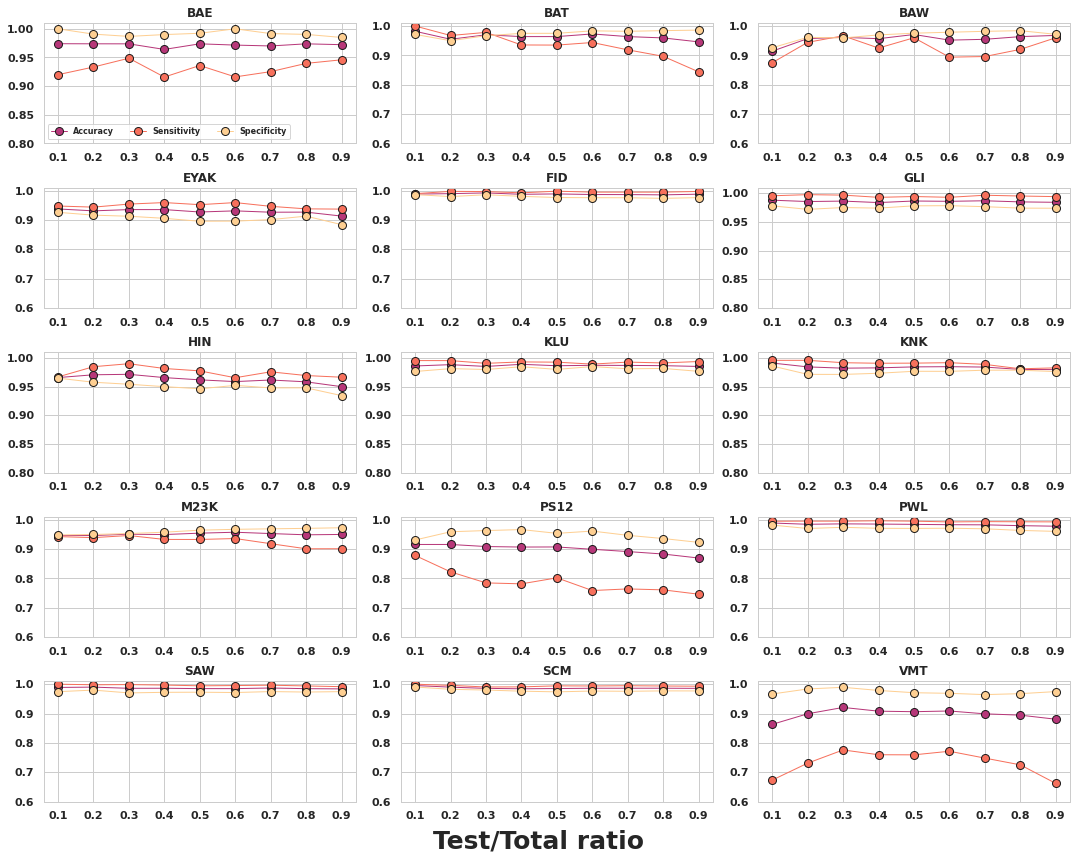

In [122]:
cmap = matplotlib.cm.get_cmap('magma')

c1 = cmap(0.1)
c2 = cmap(0.3)
c3 = cmap(0.5)
c4 = cmap(0.7)
c5 = cmap(0.9)
c6 = cmap(1.0)



accuracy_final = sens_final
plt.rcParams['axes.linewidth'] = 1

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

    
    
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=[15,12], facecolor='white')
w = 0.1
plt.setp(ax, ylim=[0.6,1])

ax[0,0].plot(ratio, acc_final_stn[0], linewidth = 1, marker = 'o', mec = 'k', ms = 8,  color= c3, label = "Accuracy")
ax[0,0].plot(ratio, sens_final_stn[0], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[0,0].plot(ratio, spec_final_stn[0], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[0,0].set_ylim(0.8,1.01)
ax[0,0].legend(ncol = 3, fontsize = 8)


ax[0,1].plot(ratio, acc_final_stn[1], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[0,1].plot(ratio, sens_final_stn[1], linewidth = 1, marker = 'o', mec = 'k', ms = 8,  color= c4, label = "Sensitivity")
ax[0,1].plot(ratio, spec_final_stn[1], linewidth = 1, marker = 'o', mec = 'k', ms = 8,  color= c5, label = "Specificity")
ax[0,1].set_ylim(0.6,1.01)


ax[0,2].plot(ratio, acc_final_stn[2], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[0,2].plot(ratio, sens_final_stn[2], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[0,2].plot(ratio, spec_final_stn[2], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[0,2].set_ylim(0.6,1.01)

ax[1,0].plot(ratio, acc_final_stn[3], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[1,0].plot(ratio, sens_final_stn[3], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[1,0].plot(ratio, spec_final_stn[3], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[1,0].set_ylim(0.6,1.01)


ax[1,1].plot(ratio, acc_final_stn[4], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[1,1].plot(ratio, sens_final_stn[4], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[1,1].plot(ratio, spec_final_stn[4], linewidth = 1,  marker = 'o', mec = 'k', ms = 8,color= c5, label = "Specificity")
ax[1,1].set_ylim(0.6,1.01)


ax[1,2].plot(ratio, acc_final_stn[5], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[1,2].plot(ratio, sens_final_stn[5], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[1,2].plot(ratio, spec_final_stn[5], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[1,2].set_ylim(0.8,1.01)


ax[2,0].plot(ratio, acc_final_stn[6], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[2,0].plot(ratio, sens_final_stn[6], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[2,0].plot(ratio, spec_final_stn[6], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[2,0].set_ylim(0.8,1.01)

ax[2,1].plot(ratio, acc_final_stn[7], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[2,1].plot(ratio, sens_final_stn[7], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[2,1].plot(ratio, spec_final_stn[7], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[2,1].set_ylim(0.8,1.01)


ax[2,2].plot(ratio, acc_final_stn[8], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[2,2].plot(ratio, sens_final_stn[8], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[2,2].plot(ratio, spec_final_stn[8], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[2,2].set_ylim(0.8,1.01)


ax[3,0].plot(ratio, acc_final_stn[9], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[3,0].plot(ratio, sens_final_stn[9], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[3,0].plot(ratio, spec_final_stn[9], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[3,0].set_ylim(0.6,1.01)


ax[3,1].plot(ratio, acc_final_stn[10], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[3,1].plot(ratio, sens_final_stn[10], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[3,1].plot(ratio, spec_final_stn[10], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[3,1].set_ylim(0.6,1.01)


ax[3,2].plot(ratio, acc_final_stn[11], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[3,2].plot(ratio, sens_final_stn[11], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[3,2].plot(ratio, spec_final_stn[11], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[3,2].set_ylim(0.6,1.01)


ax[4,0].plot(ratio, acc_final_stn[12], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[4,0].plot(ratio, sens_final_stn[12], linewidth = 1,  marker = 'o', mec = 'k', ms = 8,  color= c4, label = "Sensitivity")
ax[4,0].plot(ratio, spec_final_stn[12], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[4,0].set_ylim(0.6,1.01)

ax[4,1].plot(ratio, acc_final_stn[13], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[4,1].plot(ratio, sens_final_stn[13], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[4,1].plot(ratio, spec_final_stn[13], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[4,1].set_ylim(0.6,1.01)

ax[4,2].plot(ratio, acc_final_stn[14], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[4,2].plot(ratio, sens_final_stn[14], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[4,2].plot(ratio, spec_final_stn[14], linewidth = 1,  marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[4,2].set_ylim(0.6,1.01)






ax[0,0].set_title(stations[0], fontsize = 12, fontweight = 'bold')
ax[0,1].set_title(stations[1], fontsize = 12, fontweight = 'bold')
ax[0,2].set_title(stations[2], fontsize = 12, fontweight = 'bold')
ax[1,0].set_title(stations[3], fontsize = 12, fontweight = 'bold')
ax[1,1].set_title(stations[4], fontsize = 12, fontweight = 'bold')
ax[1,2].set_title(stations[5], fontsize = 12, fontweight = 'bold')
ax[2,0].set_title(stations[6], fontsize = 12, fontweight = 'bold')
ax[2,1].set_title(stations[7], fontsize = 12, fontweight = 'bold')
ax[2,2].set_title(stations[8],fontsize = 12, fontweight = 'bold')
ax[3,0].set_title(stations[9],fontsize = 12, fontweight = 'bold')
ax[3,1].set_title(stations[10],fontsize = 12, fontweight = 'bold')
ax[3,2].set_title(stations[11],fontsize = 12, fontweight = 'bold')
ax[4,0].set_title(stations[12],fontsize = 12, fontweight = 'bold')
ax[4,1].set_title(stations[13],fontsize = 12, fontweight = 'bold')
ax[4,2].set_title(stations[14],fontsize = 12, fontweight = 'bold')

fig.supxlabel('Test/Total ratio', fontsize=25, fontweight='bold')
#fig.supylabel('Results', fontsize=15, fontweight='bold')
fig.tight_layout()

# Experiment for the ratio of the number of decision trees in the RF model that gives the best result. 

In [34]:
## Experiment for the ratio of the training and testing dataset that gives the best result. 
 
ratio = np.linspace(100, 1000, 10)
tracc_final = [] #treeaccuracy_final
trsens_final = []
trspec_final = []
for i in tqdm(stations):
    X = pd.read_csv('/home/ak287/Icequakes_vs_Tectonicquakes/Extracted_Features/Tsfel_features_1_25_'+i+'.csv')
    y = X['label']
    X = X.drop(['label','serial_no'], axis = 1).dropna(axis = 1) 
    X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    
    acc = []
    sens = []
    spec = []
    for j in ratio:

        
        rf = RandomForestClassifier(n_estimators = int(j), random_state=0, warm_start = True)
        rf.fit(X_Train, y_Train)
        prediction = rf.predict(X_Test)  
        tn, fp, fn, tp = confusion_matrix(y_Test, prediction).ravel()
        spec.append(tn / (tn+fp))
        sens.append(tp / (tp+fn))
        acc.append(accuracy_score(prediction, y_Test))
    tracc_final.append(acc)
    trsens_final.append(sens)
    trspec_final.append(spec)
        

100%|██████████| 15/15 [14:37<00:00, 58.49s/it]


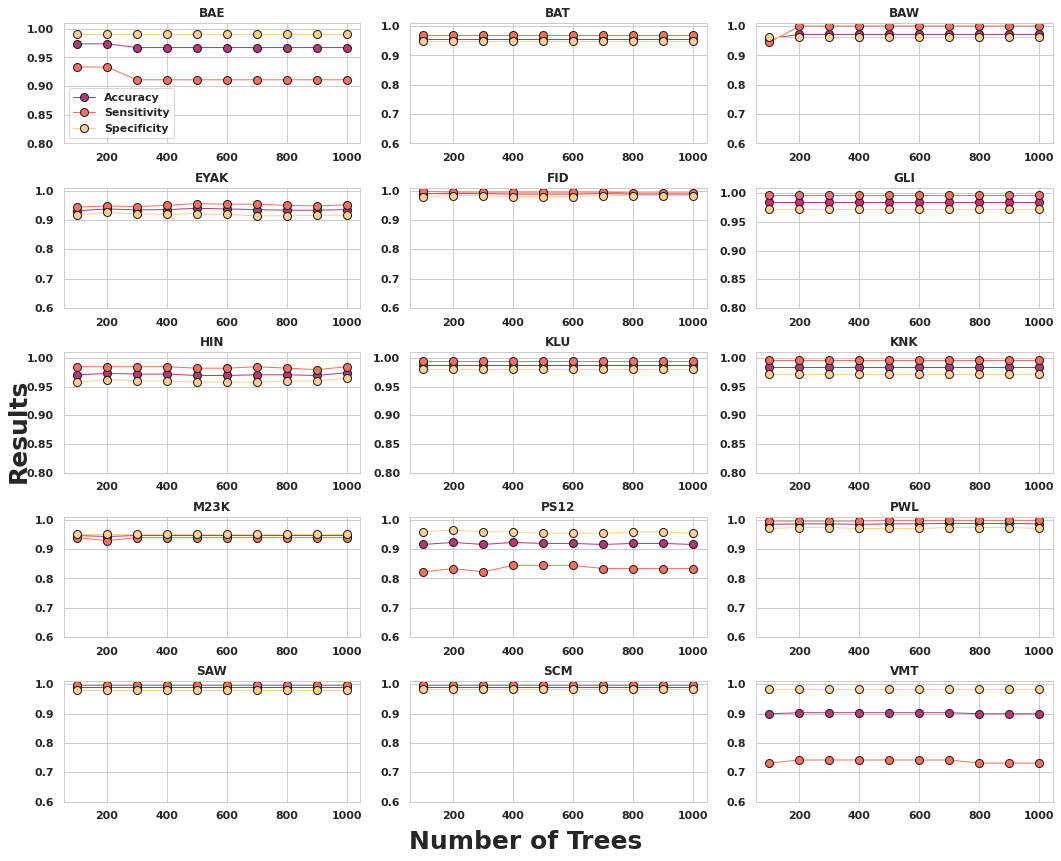

In [125]:
ratio = np.linspace(100, 1000, 10)
cmap = matplotlib.cm.get_cmap('magma')

c1 = cmap(0.1)
c2 = cmap(0.3)
c3 = cmap(0.5)
c4 = cmap(0.7)
c5 = cmap(0.9)
c6 = cmap(1.0)



accuracy_final = sens_final
plt.rcParams['axes.linewidth'] = 1

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)

    
    
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=[15,12], facecolor='white')
w = 0.1
plt.setp(ax, ylim=[0.6,1])

ax[0,0].plot(ratio, tracc_final[0], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[0,0].plot(ratio, trsens_final[0], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[0,0].plot(ratio, trspec_final[0], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[0,0].set_ylim(0.8,1.01)
ax[0,0].legend()


ax[0,1].plot(ratio, tracc_final[1], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[0,1].plot(ratio, trsens_final[1], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[0,1].plot(ratio, trspec_final[1], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[0,1].set_ylim(0.6,1.01)


ax[0,2].plot(ratio, tracc_final[2], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[0,2].plot(ratio, trsens_final[2], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[0,2].plot(ratio, trspec_final[2], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[0,2].set_ylim(0.6,1.01)

ax[1,0].plot(ratio, tracc_final[3], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[1,0].plot(ratio, trsens_final[3], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[1,0].plot(ratio, trspec_final[3], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[1,0].set_ylim(0.6,1.01)


ax[1,1].plot(ratio, tracc_final[4], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[1,1].plot(ratio, trsens_final[4], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[1,1].plot(ratio, trspec_final[4], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[1,1].set_ylim(0.6,1.01)


ax[1,2].plot(ratio, tracc_final[5], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[1,2].plot(ratio, trsens_final[5], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[1,2].plot(ratio, trspec_final[5], linewidth = 1,marker = 'o', mec = 'k', ms = 8,  color= c5, label = "Specificity")
ax[1,2].set_ylim(0.8,1.01)


ax[2,0].plot(ratio, tracc_final[6], linewidth = 1,marker = 'o', mec = 'k', ms = 8,  color= c3, label = "Accuracy")
ax[2,0].plot(ratio, trsens_final[6], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[2,0].plot(ratio, trspec_final[6], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[2,0].set_ylim(0.8,1.01)

ax[2,1].plot(ratio, tracc_final[7], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[2,1].plot(ratio, trsens_final[7], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[2,1].plot(ratio, trspec_final[7], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[2,1].set_ylim(0.8,1.01)


ax[2,2].plot(ratio, tracc_final[8], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[2,2].plot(ratio, trsens_final[8], linewidth =1,marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[2,2].plot(ratio, trspec_final[8], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[2,2].set_ylim(0.8,1.01)


ax[3,0].plot(ratio, tracc_final[9], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[3,0].plot(ratio, trsens_final[9], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[3,0].plot(ratio, trspec_final[9], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[3,0].set_ylim(0.6,1.01)


ax[3,1].plot(ratio, tracc_final[10], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[3,1].plot(ratio, trsens_final[10], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[3,1].plot(ratio, trspec_final[10], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[3,1].set_ylim(0.6,1.01)


ax[3,2].plot(ratio, tracc_final[11], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[3,2].plot(ratio, trsens_final[11], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[3,2].plot(ratio, trspec_final[11], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[3,2].set_ylim(0.6,1.01)


ax[4,0].plot(ratio, tracc_final[12], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[4,0].plot(ratio, trsens_final[12], linewidth = 1, marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[4,0].plot(ratio, trspec_final[12], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[4,0].set_ylim(0.6,1.01)

ax[4,1].plot(ratio, tracc_final[13], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[4,1].plot(ratio, trsens_final[13], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[4,1].plot(ratio, trspec_final[13], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[4,1].set_ylim(0.6,1.01)

ax[4,2].plot(ratio, tracc_final[14], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c3, label = "Accuracy")
ax[4,2].plot(ratio, trsens_final[14], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c4, label = "Sensitivity")
ax[4,2].plot(ratio, trspec_final[14], linewidth = 1,marker = 'o', mec = 'k', ms = 8, color= c5, label = "Specificity")
ax[4,2].set_ylim(0.6,1.01)






ax[0,0].set_title(stations[0], fontsize = 12, fontweight = 'bold')
ax[0,1].set_title(stations[1], fontsize = 12, fontweight = 'bold')
ax[0,2].set_title(stations[2], fontsize = 12, fontweight = 'bold')
ax[1,0].set_title(stations[3], fontsize = 12, fontweight = 'bold')
ax[1,1].set_title(stations[4], fontsize = 12, fontweight = 'bold')
ax[1,2].set_title(stations[5], fontsize = 12, fontweight = 'bold')
ax[2,0].set_title(stations[6], fontsize = 12, fontweight = 'bold')
ax[2,1].set_title(stations[7], fontsize = 12, fontweight = 'bold')
ax[2,2].set_title(stations[8],fontsize = 12, fontweight = 'bold')
ax[3,0].set_title(stations[9],fontsize = 12, fontweight = 'bold')
ax[3,1].set_title(stations[10],fontsize = 12, fontweight = 'bold')
ax[3,2].set_title(stations[11],fontsize = 12, fontweight = 'bold')
ax[4,0].set_title(stations[12],fontsize = 12, fontweight = 'bold')
ax[4,1].set_title(stations[13],fontsize = 12, fontweight = 'bold')
ax[4,2].set_title(stations[14],fontsize = 12, fontweight = 'bold')

fig.supxlabel('Number of Trees', fontsize=25, fontweight='bold')
fig.supylabel('Results', fontsize=25, fontweight='bold')
plt.tight_layout()

### Searching for best hyperparameters using Randomized Grid Search 

### Hyperparameters currently in use

In [39]:
from pprint import pprint
rf = RandomForestClassifier(random_state=0)
print("Parameters currently in use: \n")
pprint(rf.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [41]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100, 500, 5)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]

# Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10]

# Minimum number of samples required at each leaf node 
min_samples_leaf = [1,2,4]

# Methods of selecting samples for training each tree (with/without replacement)
bootstrap = [True, False]



# Create the random grid 

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 
              'min_samples_split':min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['log2', 'sqrt', None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}


In [42]:
best_params = []
for i in tqdm(range(len(stations))):
    X = pd.read_csv('/home/ak287/Icequakes_vs_Tectonicquakes/Extracted_Features/Tsfel_features_1_25_'+stations[i]+'.csv')
    y = X['label']
    X = X.drop(['label','serial_no'], axis = 1).dropna(axis = 1)
    X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    
    starttime = time.time()
    ## Use the randomm grid to search for best hyperparameters 

    # First create the base model to tune

    rf = RandomForestClassifier(random_state=0)


    # Random search of parameters , using a 3-fold cross validation, 
    # Search across 100 different combinations, and use all the cores n_jobs = -1

    rf_random = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)


    # Fit the random search model
    rf_random.fit(X_Train, y_Train)
    
    best_params.append(rf_random.best_params_)
    
    
    endtime = time.time()
    
    print(endtime - starttime)

  0%|          | 0/15 [00:00<?, ?it/s]

Fitting 3 folds for each of 100 candidates, totalling 300 fits


  7%|▋         | 1/15 [00:14<03:16, 14.07s/it]

14.019695043563843
Fitting 3 folds for each of 100 candidates, totalling 300 fits


 13%|█▎        | 2/15 [00:26<02:49, 13.06s/it]

12.310825109481812
Fitting 3 folds for each of 100 candidates, totalling 300 fits


 20%|██        | 3/15 [00:34<02:07, 10.67s/it]

7.778305530548096
Fitting 3 folds for each of 100 candidates, totalling 300 fits


 27%|██▋       | 4/15 [03:26<13:39, 74.47s/it]

172.0161485671997
Fitting 3 folds for each of 100 candidates, totalling 300 fits


 33%|███▎      | 5/15 [05:03<13:46, 82.66s/it]

96.9783844947815
Fitting 3 folds for each of 100 candidates, totalling 300 fits


 40%|████      | 6/15 [07:18<15:03, 100.43s/it]

134.68492317199707
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   5.2s
[CV] END bootstrap=False, max_depth=60, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_

 47%|████▋     | 7/15 [09:52<15:43, 117.97s/it]

153.8803186416626
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_spl

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=70

[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.5s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.8s
[CV] END bootstrap=False, max_depth=None

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.1s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   5.5s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=30

 53%|█████▎    | 8/15 [13:00<16:21, 140.19s/it]

187.5010108947754
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split

[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.6s
[CV] END bootstrap=True, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END bootstrap=False, max_depth=50, m

[CV] END bootstrap=False, max_depth=80, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=100, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.0s
[CV] END bootstrap=True, max_depth=40, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=40, max_

[CV] END bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   3.6s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   5.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=8

 60%|██████    | 9/15 [15:27<14:14, 142.41s/it]

147.05474042892456
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.4s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=5,

[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   3.2s
[CV] END bootstrap=False, max_depth=100, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=110, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=110, max

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   5.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_depth=40

[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=70, m

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=100, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=False, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   2.6s
[CV] END bootstrap=False, max_depth

 67%|██████▋   | 10/15 [16:09<09:16, 111.37s/it]

41.748438119888306
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   3.9s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=110, max_features=None, min_samples_leaf=1, min_samples_sp

[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.2s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, m

[CV] END bootstrap=False, max_depth=40, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=90, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.2s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, m

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   4.0s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   5.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, ma

[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   0.9s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.2s
[CV] END bootstrap=True, max_depth=Non

[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=False, max_depth=40, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   2.8s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   3.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.6s
[CV] END bootstrap=False, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END bootstrap=True, max_depth=10,

 73%|███████▎  | 11/15 [16:56<06:06, 91.60s/it] 

46.684266090393066
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   5.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=80, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_s

[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.6s
[CV] END bootstrap=True, max_depth=60, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=100,

 80%|████████  | 12/15 [18:18<04:25, 88.60s/it]

81.52010869979858
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   6.5s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   5.4s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   3.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=80, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=70, max_features=None, min_samples_leaf=1, min_samples_sp

[CV] END bootstrap=True, max_depth=40, max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   1.1s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=True, max_depth=11

 87%|████████▋ | 13/15 [20:56<03:39, 109.62s/it]

157.71169900894165
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=70, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   6.5s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   5.4s
[CV] END bootstrap=False, max_depth=110, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   4.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=True, max_depth=90, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=400; total time=   0.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_spli

 93%|█████████▎| 14/15 [24:03<02:13, 133.13s/it]

187.218022108078
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.5s
[CV] END bootstrap=False, max_depth=90, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time=   5.7s
[CV] END bootstrap=True, max_depth=60, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.8s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.7s
[CV] END bootstrap=False, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=2

100%|██████████| 15/15 [24:40<00:00, 98.73s/it] 

37.23598527908325


In [44]:
stations

array(['BAE', 'BAT', 'BAW', 'EYAK', 'FID', 'GLI', 'HIN', 'KLU', 'KNK',
       'M23K', 'PS12', 'PWL', 'SAW', 'SCM', 'VMT'],
      dtype='<U4')

In [43]:
best_params

[{'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 4,
  'max_features': 'sqrt',
  'max_depth': 40,
  'bootstrap': True},
 {'n_estimators': 100,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': True},
 {'n_estimators': 100,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': 70,
  'bootstrap': False},
 {'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': None,
  'max_depth': 80,
  'bootstrap': True},
 {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': 100,
  'bootstrap': True},
 {'n_estimators': 400,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},
 {'n_estimators': 500,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'sqrt',
  'max_depth': None,
  'bootstrap': False},
 {'n

In [46]:
final_report = pd.DataFrame(best_params)

In [49]:
best_params[0]

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [55]:
## Compare the performance with base model
base_model = RandomForestClassifier(n_estimators = 100, random_state=0)
base_accuracies = []
best_accuracies = []
improvement = []

for i in tqdm(range(len(stations))):
    X = pd.read_csv('/home/ak287/Icequakes_vs_Tectonicquakes/Extracted_Features/Tsfel_features_1_25_'+stations[i]+'.csv')
    y = X['label']
    X = X.drop(['label','serial_no'], axis = 1).dropna(axis = 1)
    X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)



    base_model.fit(X_Train, y_Train)
    prediction = base_model.predict(X_Test)
    base_accuracy = accuracy_score(prediction, y_Test)
    print('Random Accuracy with base hyperparameters:',base_accuracy)

    
    best_model = RandomForestClassifier(
    n_estimators=best_params[i]['n_estimators'],
    min_samples_split=best_params[i]['min_samples_split'],
    min_samples_leaf=best_params[i]['min_samples_leaf'],
    max_features=best_params[i]['max_features'],
    max_depth=best_params[i]['max_depth'],
    bootstrap=best_params[i]['bootstrap'])
    
    
    best_model.fit(X_Train, y_Train)
    best_pred = best_model.predict(X_Test)
    best_accuracy = accuracy_score(best_pred, y_Test)
    
    base_accuracies.append(base_accuracy)
    best_accuracies.append(best_accuracy)
    
    improvement.append(100*(best_accuracy -base_accuracy) / base_accuracy)


  0%|          | 0/15 [00:00<?, ?it/s]

Random Accuracy with base hyperparameters: 0.97385620915


 13%|█▎        | 2/15 [00:01<00:06,  1.87it/s]

Random Accuracy with base hyperparameters: 0.954954954955


 20%|██        | 3/15 [00:01<00:05,  2.27it/s]

Random Accuracy with base hyperparameters: 0.957142857143
Random Accuracy with base hyperparameters: 0.930885529158


 27%|██▋       | 4/15 [00:32<02:18, 12.59s/it]

Random Accuracy with base hyperparameters: 0.989505247376


 33%|███▎      | 5/15 [00:36<01:33,  9.32s/it]

Random Accuracy with base hyperparameters: 0.985714285714


 40%|████      | 6/15 [00:47<01:31, 10.14s/it]

Random Accuracy with base hyperparameters: 0.970552147239


 47%|████▋     | 7/15 [01:02<01:31, 11.48s/it]

Random Accuracy with base hyperparameters: 0.988249118684


 53%|█████▎    | 8/15 [02:09<03:24, 29.15s/it]

Random Accuracy with base hyperparameters: 0.984322508399


 60%|██████    | 9/15 [02:14<02:09, 21.56s/it]

Random Accuracy with base hyperparameters: 0.945945945946


 67%|██████▋   | 10/15 [02:16<01:17, 15.60s/it]

Random Accuracy with base hyperparameters: 0.915492957746


 73%|███████▎  | 11/15 [02:20<00:48, 12.08s/it]

Random Accuracy with base hyperparameters: 0.984218077475


 80%|████████  | 12/15 [02:31<00:35, 11.87s/it]

Random Accuracy with base hyperparameters: 0.990044247788


 87%|████████▋ | 13/15 [02:36<00:19,  9.75s/it]

Random Accuracy with base hyperparameters: 0.989921612542


 93%|█████████▎| 14/15 [03:20<00:19, 19.91s/it]

Random Accuracy with base hyperparameters: 0.89928057554


100%|██████████| 15/15 [03:21<00:00, 13.42s/it]


In [63]:
final_report['stations'] = stations
final_report['base_model_accuracy'] = base_accuracies
final_report['best_model_accuracy'] = best_accuracies
final_report['improvement'] = improvement

In [65]:
final_report.to_csv('hyperparameter_tuning_results.csv')

## Using Optuna for testing the best hyperparameters

In [79]:
def objective(trial):
    # Define the search space for each model's hyperparameters
    svc_params = {
        'C': trial.suggest_loguniform('svc_c', 1e-3, 1e3),
        'kernel': trial.suggest_categorical('svc_kernel', ['linear', 'rbf', 'poly']),
    }
    lr_params = {
        'C': trial.suggest_loguniform('lr_c', 1e-3, 1e3),
        'penalty': trial.suggest_categorical('lr_penalty', ['none', 'l2']),
    }
    rf_params = {
        'n_estimators': trial.suggest_int('rf_n_estimators', 10, 100),
        'max_depth': trial.suggest_int('rf_max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10), 
    }
    dt_params = {
        'max_depth': trial.suggest_int('dt_max_depth', 3, 10),
    }
    mlp_params = {
        'hidden_layer_sizes': trial.suggest_categorical('mlp_hidden_layer_sizes', [(100,), (50, 50), (50, 50, 50)]),
        'learning_rate': trial.suggest_categorical('mlp_learning_rate', ['constant', 'adaptive']),
    }

    
    
    # Train and evaluate each model using the sampled hyperparameters
    svc = SVC(**svc_params)
    svc.fit(X_train, y_train)
    svc_score = accuracy_score(y_test, svc.predict(X_test))

    lr = LogisticRegression(**lr_params)
    lr.fit(X_train, y_train)
    lr_score = accuracy_score(y_test, lr.predict(X_test))

    rf = RandomForestClassifier(**rf_params)
    rf.fit(X_train, y_train)
    rf_score = accuracy_score(y_test, rf.predict(X_test))

    dt = DecisionTreeClassifier(**dt_params)
    dt.fit(X_train, y_train)
    dt_score = accuracy_score(y_test, dt.predict(X_test))

    mlp = MLPClassifier(**mlp_params)
    mlp.fit(X_train, y_train)
    mlp_score = accuracy_score(y_test, mlp.predict(X_test))

    # Store the scores of all models for later retrieval
    trial.set_user_attr('svc_score', svc_score)
    trial.set_user_attr('lr_score', lr_score)
    trial.set_user_attr('rf_score', rf_score)
    trial.set_user_attr('dt_score', dt_score)
    trial.set_user_attr('mlp_score', mlp_score)

    # Return the maximum score among all models for optimization
    return max(svc_score, lr_score, rf_score, dt_score, mlp_score)




best_params_stns = []
svc_score_stns = []
lr_score_stns = []
rf_score_stns = []
dt_score_stns = []
mlp_score_stns = []


stations_new = ['BAW','VMT','GLI','SCM']
for i in tqdm(range(len(stations_new))):
    
    X = pd.read_csv('/home/ak287/Icequakes_vs_Tectonicquakes/Extracted_Features/Tsfel_features_1_25_'+stations_new[i]+'.csv')
    y = X['label']
    X = X.drop(['label','serial_no'], axis = 1).dropna(axis = 1)
    X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)
    


    # Create an Optuna study object
    study = optuna.create_study(direction='maximize')

    # Optimize the objective function
    study.optimize(objective, n_trials=10)

    # Retrieve the best hyperparameters and best model
    best_params = study.best_params
    best_model_score = study.best_value

    # Retrieve the scores of all models
    svc_score = study.best_trial.user_attrs['svc_score']
    lr_score = study.best_trial.user_attrs['lr_score']
    rf_score = study.best_trial.user_attrs['rf_score']
    dt_score = study.best_trial.user_attrs['dt_score']
    mlp_score = study.best_trial.user_attrs['mlp_score']

    
    svc_score_stns.append(svc_score)
    lr_score_stns.append(lr_score)
    rf_score_stns.append(rf_score)
    dt_score_stns.append(dt_score)
    mlp_score_stns.append(mlp_score)
    
    
    
    
    # Print the results
    print(f'Best score: {best_model_score}')
    best_params_stns.append(study.best_params)
    print(f'SVC score: {svc_score}')
    print(f'LR score: {lr_score}')
    print(f'RF score: {rf_score}')
    print(f'DT score: {dt_score}')
    print(f'MLP score: {mlp_score}')


  0%|          | 0/4 [00:00<?, ?it/s][I 2024-01-25 14:09:59,242] A new study created in memory with name: no-name-bd7f9e0b-1551-4893-bfcc-21ec24378843
[I 2024-01-25 14:10:26,468] Trial 0 finished with value: 0.9 and parameters: {'svc_c': 0.7837271140185965, 'svc_kernel': 'linear', 'lr_c': 0.4209195722744107, 'lr_penalty': 'l2', 'rf_n_estimators': 26, 'rf_max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 2, 'dt_max_depth': 3, 'mlp_hidden_layer_sizes': (100,), 'mlp_learning_rate': 'constant'}. Best is trial 0 with value: 0.9.
[I 2024-01-25 14:10:54,115] Trial 1 finished with value: 0.87 and parameters: {'svc_c': 0.0020601516641094468, 'svc_kernel': 'rbf', 'lr_c': 2.6592182798304833, 'lr_penalty': 'l2', 'rf_n_estimators': 32, 'rf_max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 7, 'dt_max_depth': 3, 'mlp_hidden_layer_sizes': (50, 50), 'mlp_learning_rate': 'adaptive'}. Best is trial 0 with value: 0.9.
[I 2024-01-25 14:11:19,055] Trial 2 finished with value: 0.875 and pa

Best score: 0.9
SVC score: 0.87
LR score: 0.855
RF score: 0.9
DT score: 0.865
MLP score: 0.83


[I 2024-01-25 14:14:39,658] A new study created in memory with name: no-name-c3832f7d-f73d-4fb1-a363-2d9e16a4f856
[I 2024-01-25 14:15:19,669] Trial 0 finished with value: 0.875 and parameters: {'svc_c': 21.318280823855762, 'svc_kernel': 'linear', 'lr_c': 4.854350419217928, 'lr_penalty': 'l2', 'rf_n_estimators': 47, 'rf_max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 6, 'dt_max_depth': 7, 'mlp_hidden_layer_sizes': (100,), 'mlp_learning_rate': 'adaptive'}. Best is trial 0 with value: 0.875.
[I 2024-01-25 14:16:17,137] Trial 1 finished with value: 0.875 and parameters: {'svc_c': 294.25668046894765, 'svc_kernel': 'poly', 'lr_c': 0.027284185748780915, 'lr_penalty': 'none', 'rf_n_estimators': 29, 'rf_max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 8, 'dt_max_depth': 10, 'mlp_hidden_layer_sizes': (50, 50), 'mlp_learning_rate': 'adaptive'}. Best is trial 0 with value: 0.875.
[I 2024-01-25 14:16:41,922] Trial 2 finished with value: 0.87 and parameters: {'svc_c': 5.202132

Best score: 0.895
SVC score: 0.49
LR score: 0.855
RF score: 0.895
DT score: 0.87
MLP score: 0.84


[I 2024-01-25 14:20:54,065] A new study created in memory with name: no-name-52942fdd-95ff-4825-b957-0d275c2729fb
[I 2024-01-25 14:21:40,567] Trial 0 finished with value: 0.89 and parameters: {'svc_c': 6.317718466039502, 'svc_kernel': 'rbf', 'lr_c': 0.03616178391366676, 'lr_penalty': 'none', 'rf_n_estimators': 86, 'rf_max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 5, 'dt_max_depth': 9, 'mlp_hidden_layer_sizes': (50, 50, 50), 'mlp_learning_rate': 'adaptive'}. Best is trial 0 with value: 0.89.
[I 2024-01-25 14:22:20,421] Trial 1 finished with value: 0.89 and parameters: {'svc_c': 12.606042171015329, 'svc_kernel': 'rbf', 'lr_c': 0.06919285638887031, 'lr_penalty': 'l2', 'rf_n_estimators': 26, 'rf_max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 9, 'dt_max_depth': 8, 'mlp_hidden_layer_sizes': (50, 50, 50), 'mlp_learning_rate': 'adaptive'}. Best is trial 0 with value: 0.89.
[I 2024-01-25 14:22:47,182] Trial 2 finished with value: 0.88 and parameters: {'svc_c': 32.53106

Best score: 0.89
SVC score: 0.86
LR score: 0.855
RF score: 0.89
DT score: 0.87
MLP score: 0.835


[I 2024-01-25 14:27:58,909] A new study created in memory with name: no-name-11b8179d-18e8-488d-98f3-dcf82a8d6887
[I 2024-01-25 14:29:59,993] Trial 0 finished with value: 0.87 and parameters: {'svc_c': 705.36431859454, 'svc_kernel': 'linear', 'lr_c': 13.101652796091255, 'lr_penalty': 'none', 'rf_n_estimators': 47, 'rf_max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 5, 'dt_max_depth': 3, 'mlp_hidden_layer_sizes': (100,), 'mlp_learning_rate': 'constant'}. Best is trial 0 with value: 0.87.
[I 2024-01-25 14:30:26,097] Trial 1 finished with value: 0.87 and parameters: {'svc_c': 214.01186444044978, 'svc_kernel': 'rbf', 'lr_c': 0.01044639106423134, 'lr_penalty': 'none', 'rf_n_estimators': 66, 'rf_max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 8, 'dt_max_depth': 3, 'mlp_hidden_layer_sizes': (100,), 'mlp_learning_rate': 'adaptive'}. Best is trial 0 with value: 0.87.
[I 2024-01-25 14:31:08,887] Trial 2 finished with value: 0.875 and parameters: {'svc_c': 48.22289577904281

Best score: 0.885
SVC score: 0.49
LR score: 0.855
RF score: 0.885
DT score: 0.865
MLP score: 0.83


In [87]:
best_params_stns

[{'svc_c': 0.7837271140185965,
  'svc_kernel': 'linear',
  'lr_c': 0.4209195722744107,
  'lr_penalty': 'l2',
  'rf_n_estimators': 26,
  'rf_max_depth': 10,
  'min_samples_split': 6,
  'min_samples_leaf': 2,
  'dt_max_depth': 3,
  'mlp_hidden_layer_sizes': (100,),
  'mlp_learning_rate': 'constant'},
 {'svc_c': 0.009606831344447245,
  'svc_kernel': 'poly',
  'lr_c': 111.97883968450584,
  'lr_penalty': 'none',
  'rf_n_estimators': 58,
  'rf_max_depth': 9,
  'min_samples_split': 2,
  'min_samples_leaf': 3,
  'dt_max_depth': 4,
  'mlp_hidden_layer_sizes': (100,),
  'mlp_learning_rate': 'constant'},
 {'svc_c': 6.317718466039502,
  'svc_kernel': 'rbf',
  'lr_c': 0.03616178391366676,
  'lr_penalty': 'none',
  'rf_n_estimators': 86,
  'rf_max_depth': 8,
  'min_samples_split': 6,
  'min_samples_leaf': 5,
  'dt_max_depth': 9,
  'mlp_hidden_layer_sizes': (50, 50, 50),
  'mlp_learning_rate': 'adaptive'},
 {'svc_c': 0.015547871881012146,
  'svc_kernel': 'rbf',
  'lr_c': 0.06629389167797406,
  'lr_pe

## Comapring different Machine Learning Methods

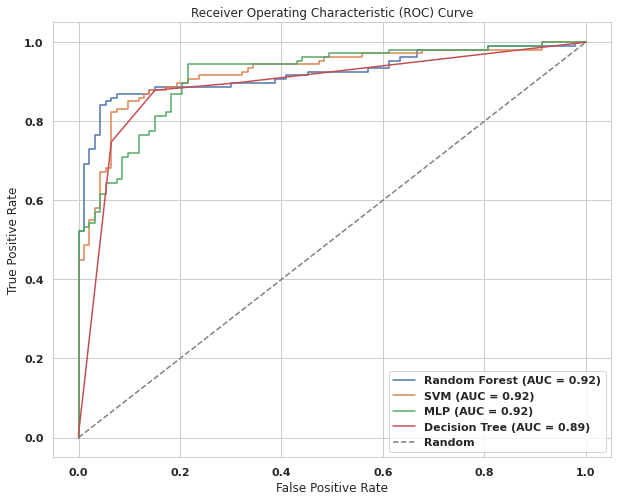

In [99]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate example data (replace with your own data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


svm_params = [{
        'C': 0.783,
        'kernel': 'linear',
    },
    
    {'C' : 0.009,
    'kernel' : 'poly'},
    
    {'C' : 6.317,
    'kernel' : 'rbf'},
    
    {'C' : 0.015, 
    'kernel' : 'rbf'}
    
]


mlp_params = [{'hidden_layer_sizes': (100,),
  'learning_rate': 'constant'},
                 
    {'hidden_layer_sizes': (100,),
  'learning_rate': 'constant'},
                 
                 
      {'hidden_layer_sizes': (50, 50, 50),
  'learning_rate': 'adaptive'},
                  
                  
     {'hidden_layer_sizes': (50, 50),
  'learning_rate': 'constant'}         
                 ]



lr_params = [
    
     {'c': 0.4209195722744107,
  'penalty': 'l2'},
    
    { 'c': 111.97883968450584,
  'penalty': 'none'},
    
    { 'c': 0.03616178391366676,
  'penalty': 'none'},
    
    { 'c': 0.06629389167797406,
  'penalty': 'none'}  
]


rf_params = [
    
    {'n_estimators': 26,
  'max_depth': 10,
  'min_samples_split': 6,
  'min_samples_leaf': 2}, 
    
    {'n_estimators': 58,
  'max_depth': 9,
  'min_samples_split': 2,
  'min_samples_leaf': 3,    
    },
    
    
    {'n_estimators': 86,
  'max_depth': 8,
  'min_samples_split': 6,
  'min_samples_leaf': 5},
    
    {'n_estimators': 69,
  'max_depth': 9,
  'min_samples_split': 7,
  'min_samples_leaf': 6,     
    }
    
]


dt_params = [
    
    {'max_depth': 3},
    {'max_depth': 4},
    {'max_depth': 9},
    {'max_depth': 3}
    
]


# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(**rf_params[0]),
    'SVM': SVC(**svm_params[0], probability = True),  # Need probability estimates for AUC
    'MLP': MLPClassifier(**mlp_parameters[0]),
    'Decision Tree': DecisionTreeClassifier(**dt_params[0]),
   
}

# Train classifiers and compute ROC/AUC
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


100%|██████████| 15/15 [06:11<00:00, 24.80s/it]


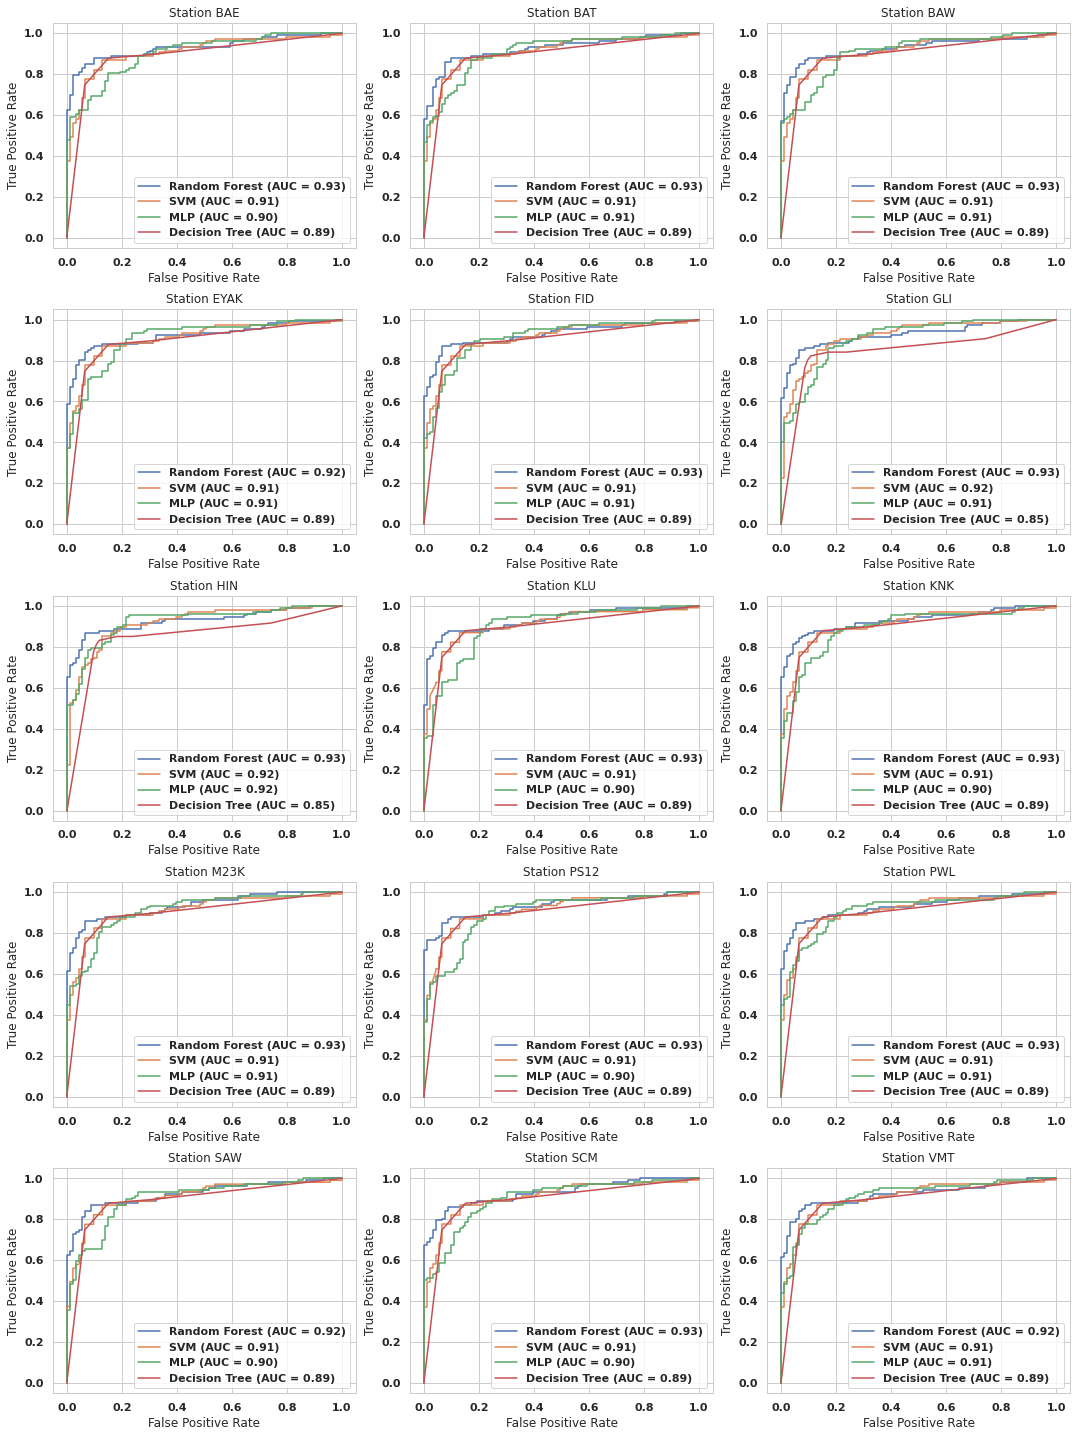

In [114]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=[15,20], facecolor='white')

svm_params = [{
        'C': 0.783,
        'kernel': 'linear',
    },
    
    {'C' : 0.009,
    'kernel' : 'poly'},
    
    {'C' : 6.317,
    'kernel' : 'rbf'},
    
    {'C' : 0.015, 
    'kernel' : 'rbf'}
    
]


mlp_params = [{'hidden_layer_sizes': (100,),
  'learning_rate': 'constant'},
                 
    {'hidden_layer_sizes': (100,),
  'learning_rate': 'constant'},
                 
                 
      {'hidden_layer_sizes': (50, 50, 50),
  'learning_rate': 'adaptive'},
                  
                  
     {'hidden_layer_sizes': (50, 50),
  'learning_rate': 'constant'}         
                 ]



lr_params = [
    
     {'c': 0.4209195722744107,
  'penalty': 'l2'},
    
    { 'c': 111.97883968450584,
  'penalty': 'none'},
    
    { 'c': 0.03616178391366676,
  'penalty': 'none'},
    
    { 'c': 0.06629389167797406,
  'penalty': 'none'}  
]


rf_params = [
    
    {'n_estimators': 26,
  'max_depth': 10,
  'min_samples_split': 6,
  'min_samples_leaf': 2}, 
    
    {'n_estimators': 58,
  'max_depth': 9,
  'min_samples_split': 2,
  'min_samples_leaf': 3,    
    },
    
    
    {'n_estimators': 86,
  'max_depth': 8,
  'min_samples_split': 6,
  'min_samples_leaf': 5},
    
    {'n_estimators': 69,
  'max_depth': 9,
  'min_samples_split': 7,
  'min_samples_leaf': 6,     
    }
    
]


dt_params = [
    
    {'max_depth': 3},
    {'max_depth': 4},
    {'max_depth': 9},
    {'max_depth': 3}
    
]



station = 'BAE'
X = pd.read_csv('/home/ak287/Icequakes_vs_Tectonicquakes/Extracted_Features/Tsfel_features_1_25_'+station+'.csv')
y = X['label']
X = X.drop(['label','serial_no'], axis = 1).dropna(axis = 1) 
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)



axs = np.hstack(ax)


for i in tqdm(range(len(stations))):
    # Initialize classifiers
    
    if stations[i] in ['BAT','BAE','BAW']:
        classifiers = {
        'Random Forest': RandomForestClassifier(**rf_params[0]),
        'SVM': SVC(**svm_params[0], probability = True),  # Need probability estimates for AUC
        'MLP': MLPClassifier(**mlp_parameters[0]),
        'Decision Tree': DecisionTreeClassifier(**dt_params[0]),

        }

    if stations[i] in ['VMT','M23K','PS12']:
        classifiers = {
        'Random Forest': RandomForestClassifier(**rf_params[1]),
        'SVM': SVC(**svm_params[1], probability = True),  # Need probability estimates for AUC
        'MLP': MLPClassifier(**mlp_parameters[1]),
        'Decision Tree': DecisionTreeClassifier(**dt_params[1]),

        }
        
   
    if stations[i] in ['HIN','GLI']:
        classifiers = {
        'Random Forest': RandomForestClassifier(**rf_params[2]),
        'SVM': SVC(**svm_params[2], probability = True),  # Need probability estimates for AUC
        'MLP': MLPClassifier(**mlp_parameters[2]),
        'Decision Tree': DecisionTreeClassifier(**dt_params[2]),

        }
        
    else:
        
         classifiers = {
        'Random Forest': RandomForestClassifier(**rf_params[3]),
        'SVM': SVC(**svm_params[3], probability = True),  # Need probability estimates for AUC
        'MLP': MLPClassifier(**mlp_parameters[3]),
        'Decision Tree': DecisionTreeClassifier(**dt_params[3]),

        }
        

    X = pd.read_csv('/home/ak287/Icequakes_vs_Tectonicquakes/Extracted_Features/Tsfel_features_1_25_'+stations[i]+'.csv')
    y = X['label']
    X = X.drop(['label','serial_no'], axis = 1).dropna(axis = 1) 
    X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 101)
        
        
    # Train classifiers and compute ROC/AUC
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities of positive class
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        axs[i].plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

    # Plot settings

    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title('Station '+stations[i])
    axs[i].legend()




plt.tight_layout()